https://tcoil.info/plot-multiple-stocks-in-python/

In [1]:
# better display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ___library_import_statements___
import pandas as pd

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

#newest yahoo API 
import yfinance as yf

%matplotlib inline

In [2]:
def f_plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # takes a dataframe, columns (list) that we want to print and range of rows
    # note: df.ix is deprecated now
    f_plot_data(df.loc[start_index:end_index])        
    # use df.loc not df.iloc since we use datetime as index

def f_get_data(symbols, dates, start_time, today):
    """Read stock data (adjusted close) for given symbols from yahoo finance"""
    df = pd.DataFrame(index=dates)
    print(df.head())
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    
    for symbol in symbols:
        # yahoo gives only daily historical data, more granular data stream is hard to get for free
        ticker_df = yf.download(symbol, start=start_time, end=today)     
        
         # reset index from dates to index numbers
        # print(ticker_df.head(2))
        #       Date        High                                                          
        # 2017-01-03  128.190002    
        # 2017-01-04  130.169998 
        ticker_df = ticker_df.reset_index()
        # print(ticker_df.head(2))
        #         Date        High  
        # 0 2017-01-03  128.190002   
        # 1 2017-01-04  130.169998
        ticker_df.set_index('Date', inplace=True, drop=False) 
        
        df_temp = ticker_df[['Date','Adj Close']]
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp[symbol])
        
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
            
    return df
        
        
def f_normalize_data(df):
    """normalizes stock data in respect to price in day 1, 
    this way price on the first day starts at 1$ for any given stock"""
    #return df/df.ix[0,:]      # deprecated option
    return df/df.iloc[0,:]     # use df.iloc not df.loc since index is number
    
def f_plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    
    ax = df.plot(title=title, fontsize=12, figsize=(20, 10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    
    #plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
    plt.title('Relative price change')
    plt.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.style.use('bmh')
    plt.grid(True)
    plt.show()

def f_run():
    # Define a date range
    start_time = datetime.datetime(2020, 1, 1)
    # end_time = datetime.datetime(2018, 6, 20)
    today = datetime.datetime.now().date().isoformat()
    dates = pd.date_range(start_time, today)

    # Choose stock symbols to read
    symbols = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']  
    # SPY will be added in f_get_data() function automatically
    
    # Get stock data
    df = f_get_data(symbols, dates, start_time, today)
    df = f_normalize_data(df)
    
    # Slice and plot
    f_plot_selected(df, ['SPY', 'FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG'], start_time, today)   


Empty DataFrame
Columns: []
Index: [2020-01-01 00:00:00, 2020-01-02 00:00:00, 2020-01-03 00:00:00, 2020-01-04 00:00:00, 2020-01-05 00:00:00]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


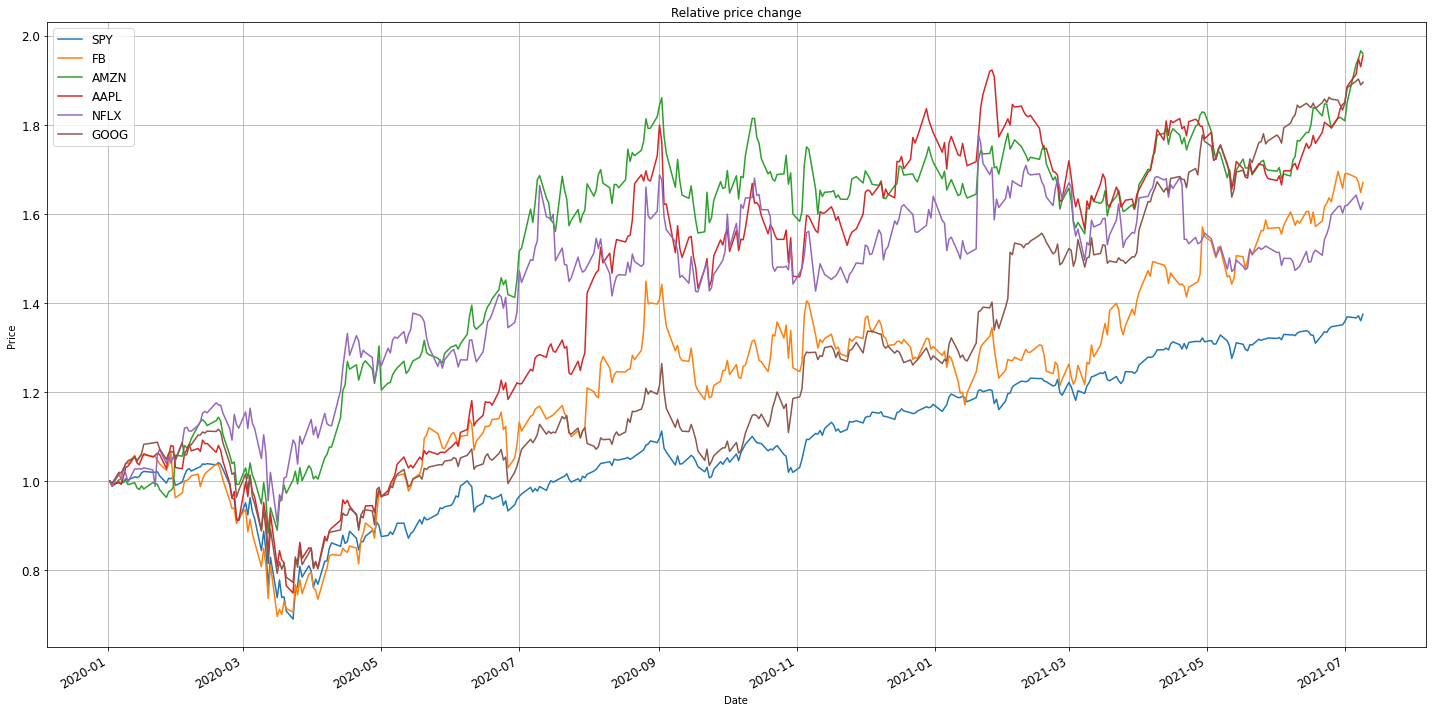

In [3]:
if __name__ == "__main__":
    f_run()